## ECGR 4105 - HW 1 Problem 1

With the help of the US Housing Dataset, a Linear Regression will be developed with Gradient Descent Algorithm to estimate the price of the house. 80% and 20% split will be used between the training and the evaluation sets. 

In [1]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing Data File (D3.csv) as df (DataFrame)
df = pd.read_csv("Housing.csv")

In [5]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
len(df)

545

In [7]:
Vars = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

In [8]:
# In order to fit the "YES" and "NO" data for the Regression line, the data is being changed to a Numerical Values
def Binary_Map(x):
    return x.map({"yes" : 1, "no" : 0})

In [9]:
df[Vars] = df[Vars].apply(Binary_Map)

In [10]:
# Splitting the data into the Training and Testing Sets (80% for Training and 20% for Testing)
random = np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = random)
m = len(df_train)
n = len(df_test)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## Problem 1a 

Development of a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For the following problem, neither normalization nor standardization technique will be used as a part of pre-processing techniques.

In [13]:
Vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

train_Prob1a = df_train[Vars]
test_Prob1a = df_test[Vars]

theta = np.zeros(len(Vars))

y = train_Prob1a.pop('price')
x = train_Prob1a

iterations = 12000
alpha = 0.0000000001

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

val_y = test_Prob1a.pop('price')
val_x = test_Prob1a

x0 = np.ones((n, 1))
val_x = np.hstack((x0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

In [15]:
y

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [148]:
iteration_array = np.arange(1, iterations + 1)

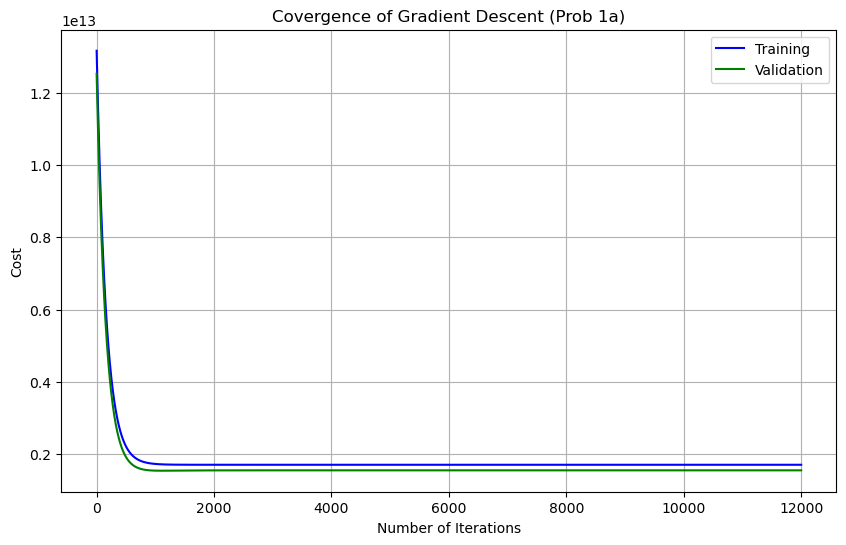

In [149]:
# Plotting the Gradient Descent Plot for the given Input Variables
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Covergence of Gradient Descent (Prob 1a)")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend();

## Problem 1b

Development of a gradient decent training and evaluation code that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

For the following problem, neither normalization nor standardization technique will be used as a part of pre-processing techniques.

In [150]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

train_Prob1b = df_train[Vars]
test_Prob1b = df_test[Vars]

iterations = 12000
alpha = 0.0000000001

theta = np.zeros(len(Vars))

y = train_Prob1b.pop('price')
x = train_Prob1b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob1b.pop('price')
val_x = test_Prob1b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation_loss =', validation_cost)

Final value of theta = [5.52898951e-01 8.61035669e+02 2.03103209e+00 1.08862468e+00
 1.65519943e+00 5.01056696e-01 2.20696202e-01 3.62483902e-01
 8.94741546e-02 4.20811910e-01 5.18266612e-01 2.36724100e-01]
cost_history = [1.31633712e+13 1.30921973e+13 1.30214655e+13 ... 1.70460901e+12
 1.70460901e+12 1.70460901e+12]
validation_loss = [1.25238033e+13 1.24534315e+13 1.23835037e+13 ... 1.55065848e+12
 1.55065848e+12 1.55065848e+12]


In [151]:
iteration_array = np.arange(1, iterations + 1)

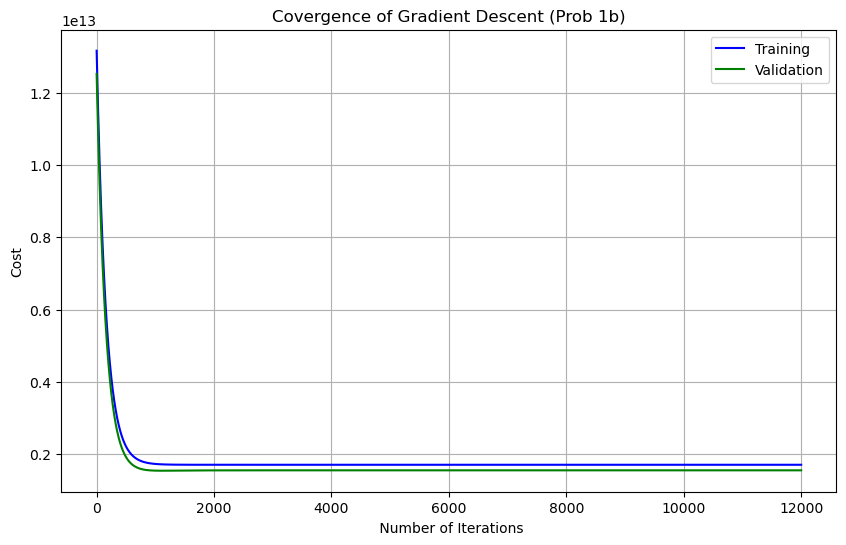

In [152]:
# Plotting the Gradient Descent Plot for the given Input Variables
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.title("Covergence of Gradient Descent (Prob 1b)")
plt.xlabel(" Number of Iterations")
plt.ylabel("Cost")
plt.legend();

## Problem 2

Repetation of Problem 1a, this time with input normalization and input standardization as part of the pre-processing logic. Two separate training will be performed for standardization and normalization. 

In [153]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

train_Prob2a = df_train[Vars]
test_Prob2a = df_test[Vars]

iterations = 10000
alpha = 0.01

# Application of Data Pre-Processing Technique - Normalization

scaler = MinMaxScaler()
train_Prob2a[Vars] = scaler.fit_transform(train_Prob2a[Vars] ) 
test_Prob2a[Vars] = scaler.fit_transform(test_Prob2a[Vars]) 

theta = np.zeros(len(Vars))

y = train_Prob2a.pop('price')
x = train_Prob2a

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob2a.pop('price')
val_x = test_Prob2a

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

In [154]:
theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history_Norm =',cost_history)
print('Validation_loss_Norm =', validation_cost)

Final value of theta = [0.04616923 0.3719979  0.10007242 0.20951034 0.13738962 0.10242389]
cost_history_Norm = [0.04697501 0.04596297 0.04497855 ... 0.00612886 0.00612885 0.00612884]
Validation_loss_Norm = [0.05200566 0.05088612 0.04979644 ... 0.00522422 0.00522425 0.00522427]


In [155]:
iteration_array = np.arange(1, iterations + 1)

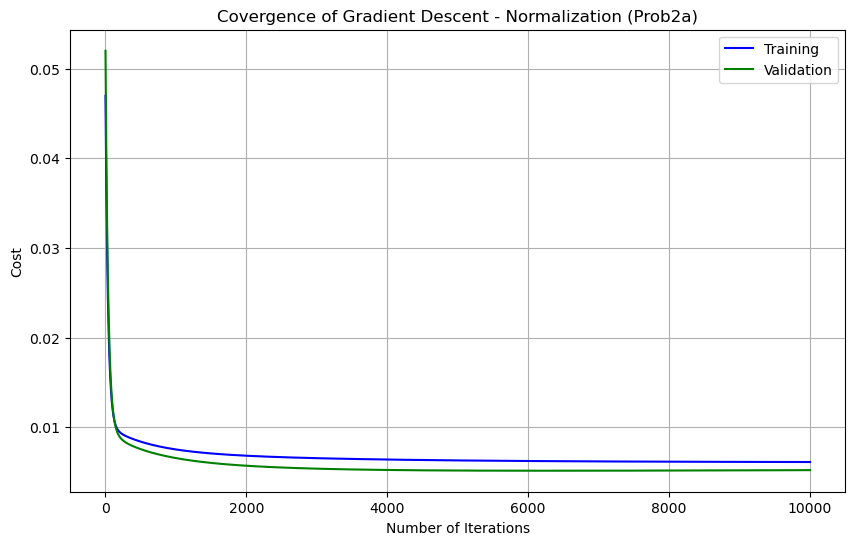

In [156]:
# Plotting the Gradient Descent Plot for the given Input Variables with Normalization
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Normalization (Prob2a)')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend();

In [157]:
# Application of Data Pre-Processing Technique - Standardization

train_Prob2a = df_train[Vars]
test_Prob2a = df_test[Vars]

scaler = StandardScaler()
train_Prob2a[Vars] = scaler.fit_transform(train_Prob2a[Vars] ) 
test_Prob2a[Vars] = scaler.fit_transform(test_Prob2a[Vars])

theta = np.zeros(len(Vars))

y = train_Prob2a.pop('price')
x = train_Prob2a

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob2a.pop('price')
val_x = test_Prob2a

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

In [158]:
theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history_Stand =',cost_history)
print('validation_loss_Stand =', validation_cost)

Final value of theta = [2.53813280e-16 3.88481823e-01 8.90638389e-02 3.04158794e-01
 2.40439813e-01 1.60108157e-01]
cost_history_Stand = [0.49011053 0.48058679 0.47141506 ... 0.22309632 0.22309632 0.22309632]
validation_loss_Stand = [0.48960607 0.47959092 0.46994044 ... 0.19448616 0.19448616 0.19448616]


In [159]:
iteration_array = np.arange(1, iterations + 1)

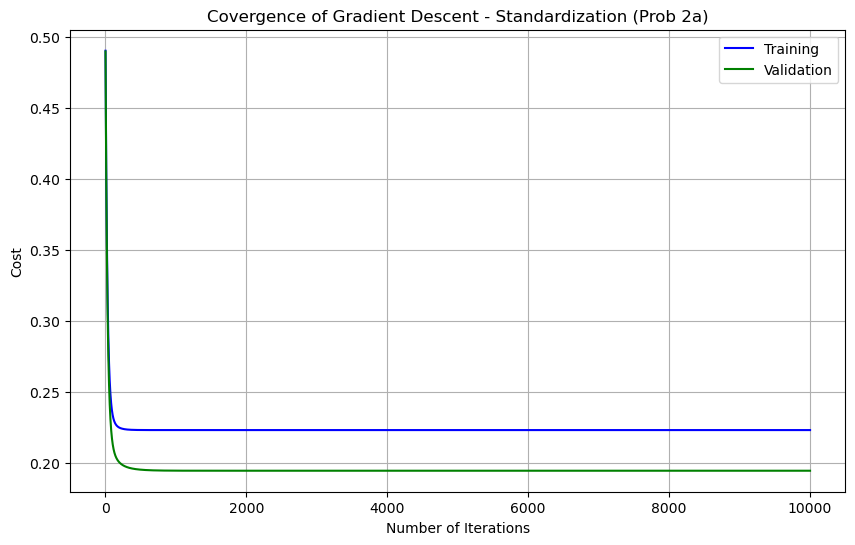

In [160]:
# Plotting the Gradient Descent Plot for the given Input Variables with Standardiization
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Standardization (Prob 2a)')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend();

In [161]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

train_Prob2b = df_train[Vars]
test_Prob2b = df_test[Vars]

iterations = 12000
alpha = 0.01

# Application of Data Pre-Processing Technique - Normalization

scaler = MinMaxScaler()
train_Prob2b[Vars] = scaler.fit_transform(train_Prob2b[Vars]) 
test_Prob2b[Vars] = scaler.fit_transform(test_Prob2b[Vars]) 

theta = np.zeros(len(Vars))

y = train_Prob2b.pop('price')
x = train_Prob2b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob2b.pop('price')
val_x = test_Prob2b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

In [162]:
theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history_Norm =',cost_history)
print('validation_loss_Norm =', validation_cost)

Final value of theta = [-0.00045882  0.2770333   0.06753607  0.17874094  0.1114527   0.04416715
  0.03976096  0.02884317  0.10441519  0.07924342  0.07003713  0.06477103]
cost_history_Norm = [0.04602978 0.04414316 0.04235062 ... 0.00449891 0.00449891 0.00449891]
validation_loss_Norm = [0.05102886 0.04900518 0.04707974 ... 0.00441321 0.00441321 0.00441322]


In [163]:
iteration_array = np.arange(1, iterations + 1)

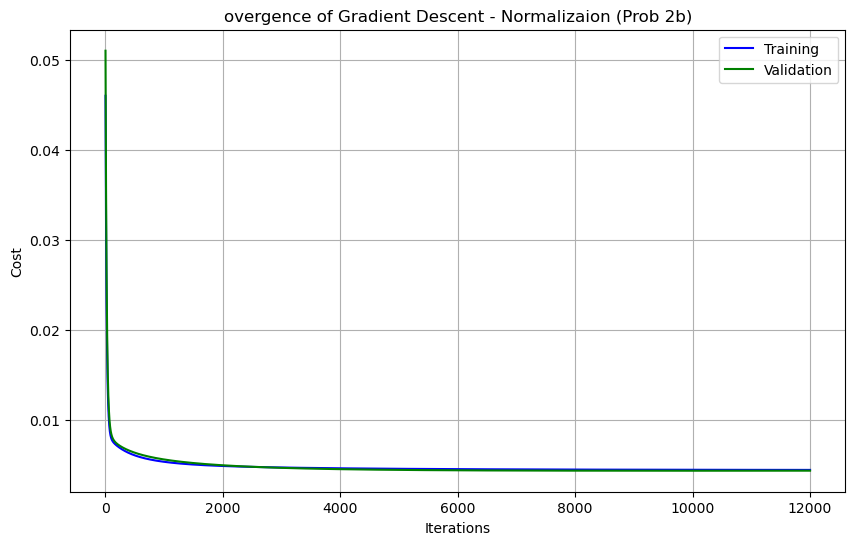

In [165]:
# Plotting the Gradient Descent Plot for the given Input Variables with Normalization
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = "Validation")
plt.grid()
plt.title("overgence of Gradient Descent - Normalizaion (Prob 2b)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend();

In [166]:
# Application of Data Pre-Processing Technique - Standardization

train_Prob2b = df_train[Vars]
test_Prob2b = df_test[Vars]

scaler = StandardScaler()
train_Prob2b[Vars] = scaler.fit_transform(train_Prob2b[Vars]) 
test_Prob2b[Vars] = scaler.fit_transform(test_Prob2b[Vars]) 

theta = np.zeros(len(Vars))

y = train_Prob2b.pop('price')
x = train_Prob2b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob2b.pop('price')
val_x = test_Prob2b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

In [167]:
theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history_Stand =',cost_history)
print('validation_loss_Stand =', validation_cost)

Final value of theta = [2.97977748e-16 2.86802300e-01 5.66977841e-02 2.60175343e-01
 2.00694996e-01 8.59288751e-02 8.77004231e-02 8.75035985e-02
 1.26523800e-01 2.19592259e-01 1.11768608e-01 1.60270222e-01]
cost_history_Stand = [0.48459181 0.4699109  0.45592266 ... 0.16415713 0.16415713 0.16415713]
validation_loss_Stand = [0.48553152 0.47171589 0.45852282 ... 0.15981494 0.15981494 0.15981494]


In [168]:
iteration_array = np.arange(1, iterations + 1)

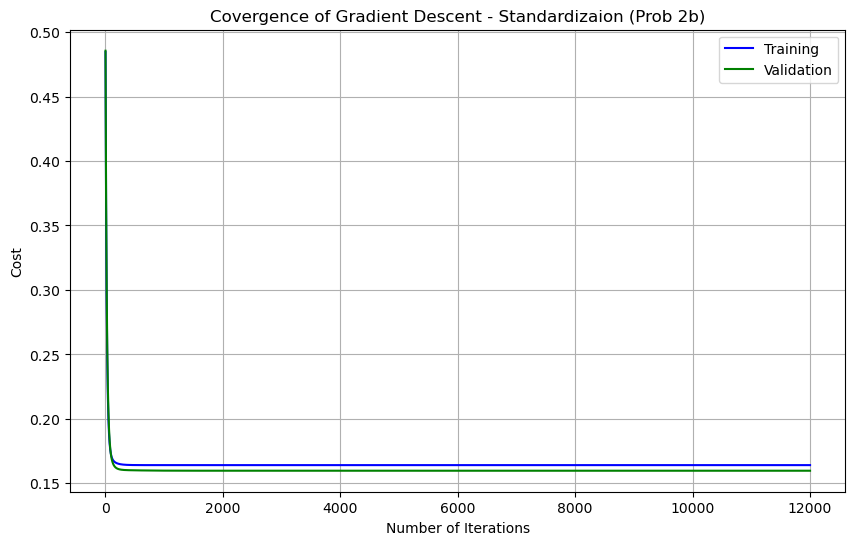

In [169]:
# Plotting the Gradient Descent Plot for the given Input Variables with Standardiization

plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Standardizaion (Prob 2b)')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend();

## Problem 3

Repetation of Problem 2a, this time with Parameter Penalty for Larger Values as part of the pre-processing logic. The Gradient Descent logic will be modified for the Training Set, but not for the Validation Set.

In [170]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

train_Prob3a = df_train[Vars]
test_Prob3a = df_test[Vars]

iterations = 1000
alpha = 0.01

scaler = MinMaxScaler()
train_Prob3a[Vars] = scaler.fit_transform(train_Prob3a[Vars] ) 
test_Prob3a[Vars] = scaler.fit_transform(test_Prob3a[Vars]) 

theta = np.zeros(len(Vars))

y = train_Prob3a.pop('price')
x = train_Prob3a

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob3a.pop('price')
val_x = test_Prob3a

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

In [171]:
theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)

Final value of theta = [0.12751457 0.11865935 0.09194692 0.1268308  0.11792398 0.10900202]
cost_history = [0.04697501 0.04596297 0.04497855 0.04402097 0.04308952 0.04218346
 0.04130211 0.04044478 0.03961082 0.03879959 0.03801047 0.03724284
 0.03649612 0.03576974 0.03506314 0.03437578 0.03370713 0.03305667
 0.03242391 0.03180837 0.03120957 0.03062705 0.03006037 0.02950909
 0.02897279 0.02845106 0.0279435  0.02744973 0.02696935 0.02650202
 0.02604737 0.02560505 0.02517472 0.02475606 0.02434875 0.02395247
 0.02356693 0.02319183 0.02282687 0.0224718  0.02212633 0.0217902
 0.02146315 0.02114494 0.02083533 0.02053407 0.02024095 0.01995573
 0.0196782  0.01940816 0.01914539 0.01888969 0.01864088 0.01839876
 0.01816315 0.01793387 0.01771075 0.01749362 0.01728232 0.01707668
 0.01687656 0.01668179 0.01649224 0.01630776 0.01612822 0.01595346
 0.01578338 0.01561783 0.0154567  0.01529986 0.01514719 0.01499859
 0.01485393 0.01471312 0.01457604 0.0144426  0.0143127  0.01418623
 0.0140631  0.01394323 0

In [172]:
iteration_array = np.arange(1, iterations + 1)

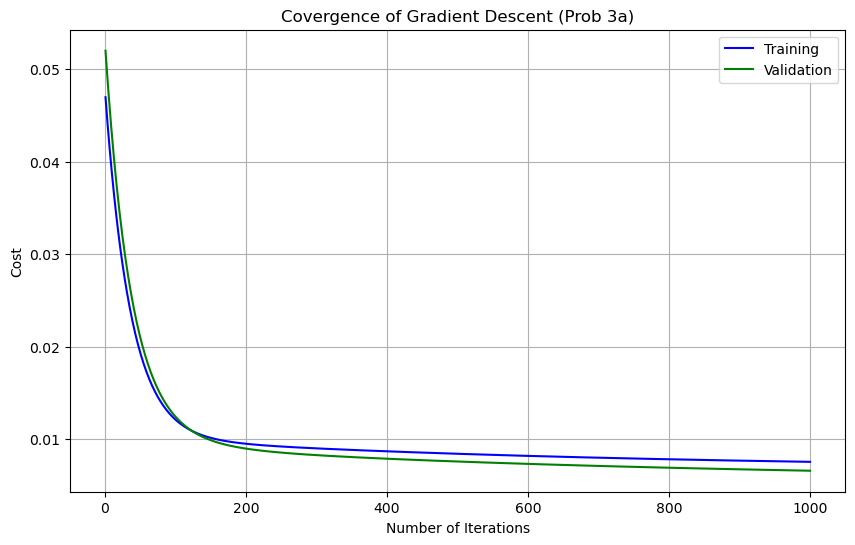

In [173]:
# Plotting the Gradient Descent Plot for the given Input Variables with Normalization and Parameter Penalty
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.title("Covergence of Gradient Descent (Prob 3a)")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend();

In [174]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

train_Prob3b = df_train[Vars]
test_Prob3b = df_test[Vars]

iterations = 1000
alpha = 0.01

scaler = MinMaxScaler()
train_Prob3b[Vars] = scaler.fit_transform(train_Prob3b[Vars] ) 
test_Prob3b[Vars] = scaler.fit_transform(test_Prob3b[Vars]) 

theta = np.zeros(len(Vars))

y = train_Prob3b.pop('price')
x = train_Prob3b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_Prob3b.pop('price')
val_x = test_Prob3b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

In [175]:
theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('Cost_history =',cost_history)
print('Validation loss =', validation_cost)

Final value of theta = [0.04976613 0.07719054 0.0579453  0.1055315  0.089929   0.05859843
 0.04525963 0.02994134 0.03866411 0.09168724 0.07553271 0.07281426]
Cost_history = [0.04602978 0.04414316 0.04235062 0.04064744 0.03902915 0.0374915
 0.03603045 0.03464215 0.03332298 0.03206946 0.0308783  0.0297464
 0.02867077 0.0276486  0.02667721 0.02575406 0.02487674 0.02404294
 0.0232505  0.02249733 0.02178148 0.02110108 0.02045434 0.01983959
 0.01925522 0.01869972 0.01817163 0.01766959 0.01719229 0.0167385
 0.01630703 0.01589677 0.01550667 0.0151357  0.01478291 0.0144474
 0.0141283  0.01382479 0.01353608 0.01326145 0.01300017 0.0127516
 0.01251508 0.01229003 0.01207585 0.01187202 0.01167802 0.01149335
 0.01131754 0.01115016 0.01099078 0.01083901 0.01069446 0.01055677
 0.0104256  0.01030063 0.01018154 0.01006805 0.00995987 0.00985674
 0.0097584  0.00966462 0.00957517 0.00948983 0.00940841 0.0093307
 0.00925651 0.00918569 0.00911804 0.00905343 0.0089917  0.0089327
 0.0088763  0.00882237 0.00877

In [176]:
iteration_array = np.arange(1, iterations + 1)

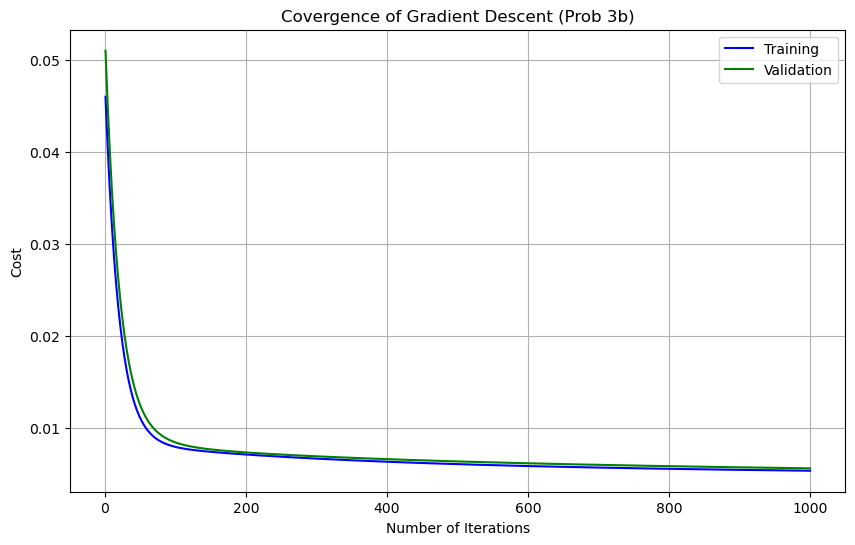

In [177]:
# Plotting the Gradient Descent Plot for the given Input Variables with Normalization and Parameter Penalty
plt.plot(iteration_array, cost_history, color= 'blue', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'green', label = 'Validation')
plt.grid()
plt.title("Covergence of Gradient Descent (Prob 3b)")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend();